In [2]:
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np


In [98]:
data_frame = pd.read_csv("quakes.csv")

data_frame.head()



,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2019-02-10 04:34:16,33.093833,-116.033333,9.55,0.87,ml,18.0,64.00,0.1287,0.28,...,2019-02-10T04:37:55.802Z,"11km ESE of Ocotillo Wells, CA",earthquake,0.56,2.15,0.109000,12.0,automatic,ci,ci
1,2019-02-10 04:29:47,35.801800,-116.460700,4.00,2.10,ml,13.0,276.24,0.1660,0.14,...,2019-02-10T04:31:15.319Z,"62km SW of Pahrump, Nevada",earthquake,NaN,7.30,NaN,NaN,automatic,nn,nn
2,2019-02-10 04:29:28,34.709167,-116.285833,2.19,2.83,ml,24.0,59.00,0.1138,0.17,...,2019-02-10T04:33:08.980Z,"12km W of Ludlow, CA",earthquake,0.28,0.73,0.155000,24.0,automatic,ci,ci
3,2019-02-10 04:28:00,63.444300,-147.559100,3.90,1.60,ml,NaN,NaN,NaN,0.68,...,2019-02-10T04:31:45.405Z,"69km E of Cantwell, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
4,2019-02-10 04:10:07,47.964167,-122.378500,27.13,2.33,ml,19.0,75.00,NaN,0.14,...,2019-02-10T04:22:28.600Z,"5km WNW of Mukilteo, Washington",earthquake,0.41,1.06,0.194838,11.0,reviewed,uw,uw


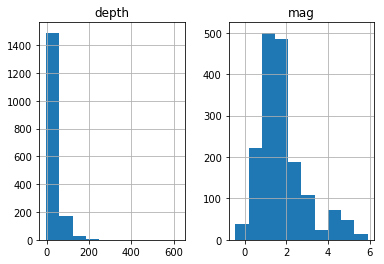

In [127]:
data_frame[['mag','depth']].hist()
plt.show()



In [109]:
x = data_frame[['mag','depth']]
# y = data_frame['depth']

x

,mag,depth
0,0.87,9.55
1,2.10,4.00
2,2.83,2.19
3,1.60,3.90
4,2.33,27.13
5,4.50,141.31
6,0.97,3.92
7,1.50,41.50
8,1.80,48.80
9,0.73,11.60


In [122]:
# x=x.values.reshape(-1, 1)
x = np.array(x)

In [123]:
x

array([[ 0.87,  9.55],
       [ 2.1 ,  4.  ],
       [ 2.83,  2.19],
       ...,
       [ 3.  ,  5.  ],
       [ 5.1 , 48.31],
       [ 2.14, 72.  ]])

In [115]:
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]

score

[-3080444.5334801646,
 -1402116.1802490903,
 -594173.6121221026,
 -302845.5036088041,
 -191243.1376080417,
 -135063.49996669096,
 -100134.08223311296,
 -74903.17715535781,
 -58534.11323909482,
 -48264.74360757845,
 -41647.21058768281,
 -35092.68170136034,
 -31949.160134660353,
 -26961.221220167517,
 -23788.199989918787,
 -20351.265277157196,
 -17729.532907481247,
 -15215.361172402187,
 -13577.864063391571]

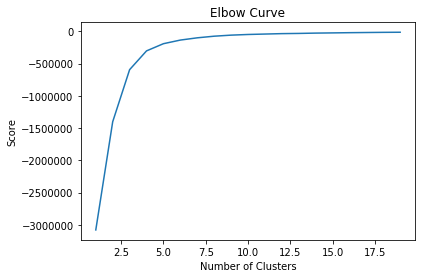

In [116]:
pl.plot(Nc,score)

pl.xlabel('Number of Clusters')

pl.ylabel('Score')

pl.title('Elbow Curve')

pl.show()

In [124]:
kmeans=KMeans(n_clusters=5)

kmeansoutput_x=kmeans.fit(x)
# kmeansoutput_y=kmeans.fit(y)
# kmeansoutput_z=kmeans.fit(z)

type(kmeansoutput_x)
# type(kmeansoutput_y)
# type(kmeansoutput_z)

sklearn.cluster.k_means_.KMeans

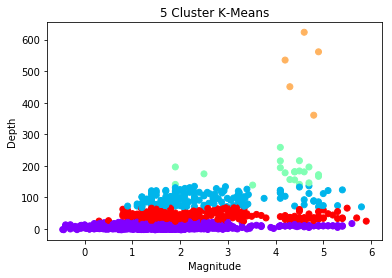

In [128]:
pl.figure('5 Cluster K-Means')


pl.scatter(x[:,0],x[:,1], c=kmeansoutput_x.labels_, cmap='rainbow')

pl.title('5 Cluster K-Means')
pl.xlabel('Magnitude')

pl.ylabel('Depth')


pl.show()